In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import numpy as np
import os
from IPython.display import Image as Image2
from numpy import genfromtxt 
import pickle
from IPython import embed
from PIL import Image, ImageDraw, ImageFont 

import seaborn as sns
import pandas as pd
%matplotlib inline
from scipy import ndimage
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.patches as mpatches

from sklearn.cluster import KMeans
import random

In [2]:
large_data = '../data/DominicaCodas.csv'
my_data = genfromtxt(large_data, delimiter=',',dtype=None,encoding="utf8")
my_data[0,:]

array(['\ufeffcodaNUM2018', 'Date', 'nClicks', 'Duration', 'ICI1', 'ICI2',
       'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'CodaType',
       'Clan', 'Unit', 'UnitNum', 'IDN'], dtype='<U12')

In [16]:
all_tempos = my_data[1:,3].astype(float)

clans = my_data[1:,-4]

# Only use codas of the EC1 clan
all_tempos_labelled = []

for i in range(len(clans)):
    if clans[i]=='EC1':
        all_tempos_labelled.append(all_tempos[i]) 
        
# Omit anamolous annotations
all_tempos_ec1 = []
for i in range(len(all_tempos_labelled)):
    if all_tempos_labelled[i]>0.1 and all_tempos_labelled[i]<1.75:
        all_tempos_ec1.append(all_tempos_labelled[i])

print(f"Number of codas from the EC1 clan: {len(all_tempos_ec1)}")

Number of codas from the EC1 clan: 7737


In [17]:
# Plot the tempo clusters

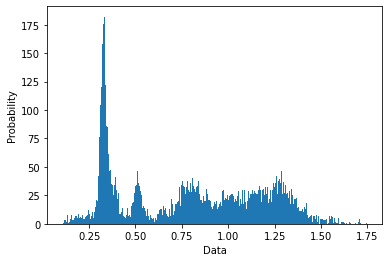

In [18]:
x = all_tempos_ec1
plt.hist(x, bins=400)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

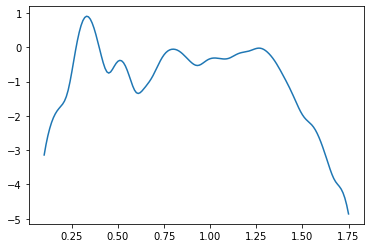

In [19]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot


a = array(all_tempos_ec1).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.035).fit(a)
s = np.arange(0.1, 1.75 + 0.01, 0.01)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [20]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [0.45 0.61 0.93 1.08]
Maxima: [0.33 0.51 0.8  1.02 1.26]


Text(0.5, 0, 'Tempo')

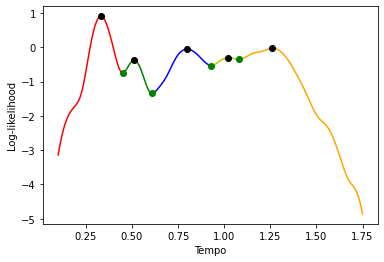

In [21]:
plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:mi[1]+1], e[mi[0]:mi[1]+1], 'g',
     s[mi[1]:mi[2]+1], e[mi[1]:mi[2]+1], 'b',
     s[mi[2]:mi[3]+1], e[mi[2]:mi[3]+1], 'y',
     s[mi[3]:], e[mi[3]:], 'orange',
     s[ma], e[ma], 'ko',
     s[mi], e[mi], 'go')

plt.ylabel("Log-likelihood")
plt.xlabel("Tempo")

# plt.savefig('kde.ps')

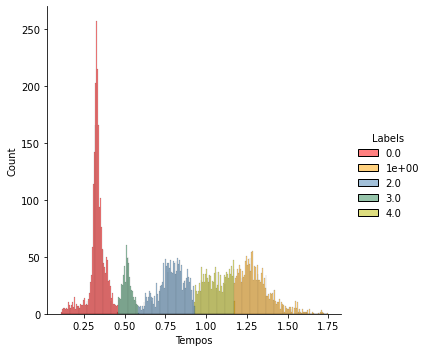

In [22]:
from sklearn.mixture import GaussianMixture
ncomp=5
gm = GaussianMixture(n_components=ncomp, random_state=0).fit(np.array(omit_zeros).reshape(-1, 1))
labels = gm.predict(np.array(omit_zeros).reshape(-1, 1))

data = np.stack([omit_zeros, labels], axis=1)
df = pd.DataFrame(data, columns=["Tempos", "Labels"])

colour_chart = ['r','orange','steelblue','seagreen','y','m','c','#A2142F','#4DBEEE','#7E2F8E','#77AC30','#D95319','#0072BD']

sns.displot(data=df, x="Tempos", hue="Labels",palette=colour_chart[:ncomp],bins=300)